In [93]:
from sys import getsizeof
from collections import namedtuple
from dataclasses import dataclass
from typing import Any
from PIL import Image , ImageFilter

In [80]:
title='HarryPotter'
author='Roling'
book1={'title':title, 'author':author}
_Book=namedtuple('Book', 'title author')
book2=_Book(title, author)
@dataclass(frozen=True)
class Book:
    title: str
    author: Any
book3=Book(title, author)

In [81]:
print(getsizeof(book1))

240


In [82]:
print(getsizeof(book2))

64


In [83]:
print(getsizeof(book3))

56


In [84]:
getsizeof([])

64

In [151]:
image='D:/Downloads/Layla-256x256.JPG'

In [152]:
image=Image.open(image)

In [153]:
blurred = image.copy().filter(ImageFilter.GaussianBlur(radius=2))

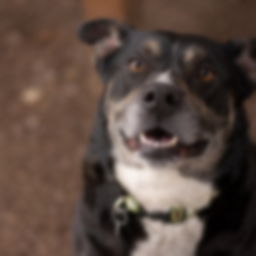

In [154]:
blurred

In [175]:
median=image.filter(ImageFilter.BoxBlur(4))

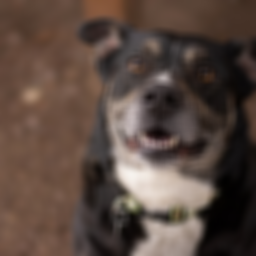

In [176]:
median

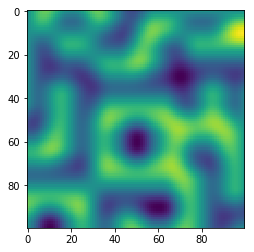

In [191]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def perlin(x,y,seed=0):
    # permutation table
    np.random.seed(seed)
    p = np.arange(256,dtype=int)
    np.random.shuffle(p)
    p = np.stack([p,p]).flatten()
    # coordinates of the top-left
    xi = x.astype(int)
    yi = y.astype(int)
    # internal coordinates
    xf = x - xi
    yf = y - yi
    # fade factors
    u = fade(xf)
    v = fade(yf)
    # noise components
    n00 = gradient(p[p[xi]+yi],xf,yf)
    n01 = gradient(p[p[xi]+yi+1],xf,yf-1)
    n11 = gradient(p[p[xi+1]+yi+1],xf-1,yf-1)
    n10 = gradient(p[p[xi+1]+yi],xf-1,yf)
    # combine noises
    x1 = lerp(n00,n10,u)
    x2 = lerp(n01,n11,u) # FIX1: I was using n10 instead of n01
    return lerp(x1,x2,v) # FIX2: I also had to reverse x1 and x2 here

def lerp(a,b,x):
    "linear interpolation"
    return a + x * (b-a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h,x,y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    g = vectors[h%4]
    return g[:,:,0] * x + g[:,:,1] * y

lin = np.linspace(0,5,100,endpoint=False)
x,y = np.meshgrid(lin,lin) # FIX3: I thought I had to invert x and y here but it was a mistake

plt.imshow(perlin(x,y,seed=1),origin='upper')

In [ ]:
np.random.seed(seed)

In [254]:
p = np.arange(256,dtype=int)
np.random.shuffle(p)

In [246]:
p

array([148, 246, 220, 189, 154, 254,  25, 135, 204, 108,  21,  32, 230,
       130, 146, 200,  79,  96,  45, 173,  67, 174, 127, 209,  92,   9,
       152,  36,   8,  86, 156,  15, 181, 105, 226, 234, 215, 119,  33,
       233, 250, 247, 163, 101,  44, 150,  90, 251, 131,  49,  23,  55,
       107, 113,  81, 183, 207, 241, 165,  14, 155, 168,  82, 238, 128,
        56,  62,  75,  54,  26, 117, 116,  13, 193, 194,  16, 121,   2,
       201,   7, 225, 177, 125, 160, 249, 115,  34,  94, 255,  24,   1,
       162,   6, 129, 245,  52, 221, 239, 175,  50, 186, 167, 217, 120,
        37, 197,  17,  57,  93, 212, 126,  46, 252,  47, 111, 199,  38,
         0, 178, 164, 170,  99,  20, 144, 180,  91,  74, 157, 198, 190,
       206,  30, 133,  63, 151, 136, 158, 224, 210, 141,  71, 244,  88,
        39,  10,  95, 145, 237, 223, 169, 139,  84,  85, 102,  29,  70,
       214, 191,  19,  35,  18, 140,  97, 231,  72,   4, 236, 172,  83,
       106,  87,  43, 192,  66,  69, 132, 109, 110,  77,  59,  6

In [199]:
p = np.stack([p,p]).flatten()

In [309]:
seed=100
np.random.seed(seed)
p = np.arange(256,dtype=int)
np.random.shuffle(p)
p = np.stack([p,p]).flatten()
x=np.linspace(0,5,100,endpoint=False)
y=np.linspace(0,5,100,endpoint=False)
xi = x.astype(int)
yi = y.astype(int)
xf = x - xi
yf = y - yi
u = fade(xf)
v = fade(yf)

In [308]:
fade=lambda x: 6 * x**5 - 15 * x**4 + 10 * x**3

In [318]:
def gradient(h,x,y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    g = vectors[h%4]
    return g[:,:,0] * x + g[:,:,1] * y

g=gradient(p[p[xi]+yi],xf,yf)

IndexError: too many indices for array

In [321]:
h=p[p[xi]+yi]
vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])
g = vectors[h%4]

In [424]:
def generate_perlin_noise_2d(shape, res):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3
    
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:,1:].repeat(d[0], 0).repeat(d[1], 1)
    n00 = np.sum(grid * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1])) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0], grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)

In [513]:
perlin=generate_perlin_noise_2d((512,512), (4,4))

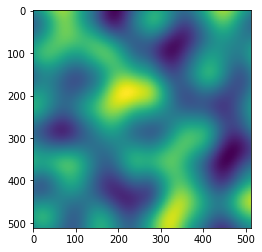

In [514]:
plt.imshow(perlin)

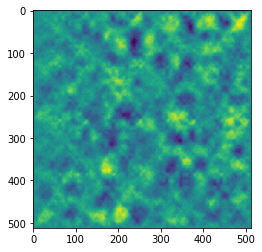

In [603]:
import cv2
def up(x):
    return np.block([[x]*2]*2)

ks = 2
xs = [np.random.randn(16, 16)]
for _ in range(5):
    xs.append(up(xs[-1]) / ks)

def resize(x, size=512):
    area = size * size / (x.shape[0] * x.shape[1])
    xi = cv2.integral(x)
    xi = cv2.resize(xi, (size+1, size+1), interpolation=cv2.INTER_CUBIC)
    x = np.diff(xi, axis=0)
    x = np.diff(x, axis=1)
    return x * area

xs = [resize(x) for x in xs]
xs = sum(xs)
plt.imshow(xs)

In [604]:
xs.shape

(512, 512)

In [610]:
s=np.empty((512,512,3))

In [611]:
# s[:,:,0]=sum([resize(x) for x in xs])
# s[:,:,1]=sum([resize(x) for x in xs])
# s[:,:,2]=sum([resize(x) for x in xs])

In [642]:
s[:,:,0]=generate_perlin_noise_2d((512,512), (8,16))
s[:,:,1]=generate_perlin_noise_2d((512,512), (16,8))
s[:,:,2]=generate_perlin_noise_2d((512,512), (2,2))

In [643]:
s.shape

(512, 512, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


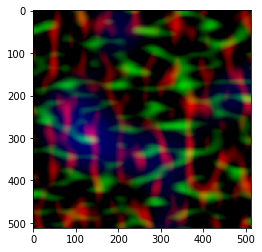

In [644]:
plt.imshow(s)